In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\alvarocairo\Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# Use the 'value_counts' function to count occurrences of each number of children
child_counts = df['children'].value_counts()

# Print the results
print(child_counts)

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [4]:
# Group the data by the 'children' column and calculate the mean expenses for each group
mean_expenses_per_child = df.groupby('children')['expenses'].mean()

# Print the results
print(mean_expenses_per_child)

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64


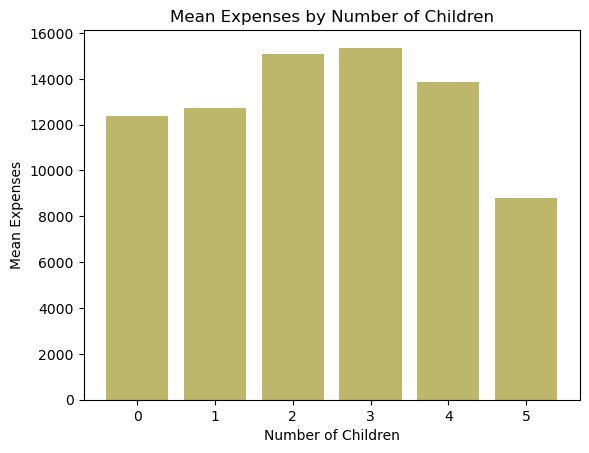

In [5]:
# Group the data by the 'children' column and calculate the mean expenses for each group
mean_expenses_per_child = df.groupby('children')['expenses'].mean()

# Define color
color = ['darkkhaki']

# Create a histogram
plt.bar(mean_expenses_per_child.index, mean_expenses_per_child.values, color=color)
plt.xlabel('Number of Children')
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses by Number of Children')
plt.xticks(mean_expenses_per_child.index)
plt.show()

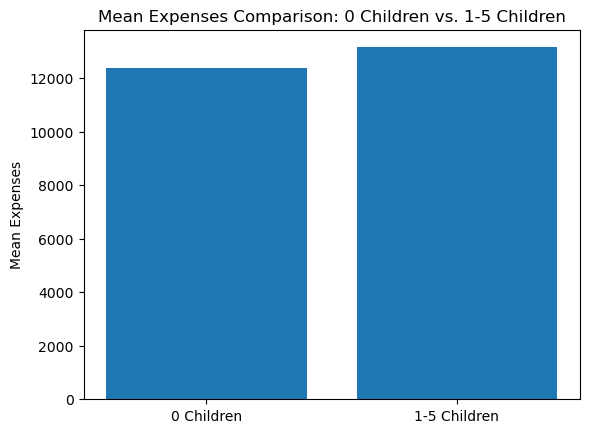

In [6]:
# Create a new group for 1 to 5 children and calculate the mean expenses
mean_expenses_1_to_5_children = mean_expenses_per_child.loc[1:5].mean()

# Create a histogram comparing 0 children to the mean of 1 to 5 children
plt.bar(['0 Children', '1-5 Children'], [mean_expenses_per_child[0], mean_expenses_1_to_5_children])
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses Comparison: 0 Children vs. 1-5 Children')
plt.show()

In [7]:
# Separate data into two groups: 0 children and 1 to 5 children
expenses_0_children = df[df['children'] == 0]['expenses']
expenses_1_to_5_children = df[(df['children'] >= 1) & (df['children'] <= 5)]['expenses']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(expenses_0_children, expenses_1_to_5_children)

# Print the results
print("Independent Samples t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance at a significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("The difference in mean expenses is statistically significant.")
else:
    print("There is no statistically significant difference in mean expenses.")


Independent Samples t-test Results:
t-statistic: -2.3721
P-value: 0.0178
The difference in mean expenses is statistically significant.


In [8]:
# Group the data by the 'children' column and collect expenses for each group
groups = [df[df['children'] == i]['expenses'] for i in range(6)]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("Analysis of Variance (ANOVA) Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance at a significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in mean expenses among the groups.")
else:
    print("There is no statistically significant difference in mean expenses among the groups.")

Analysis of Variance (ANOVA) Results:
F-statistic: 3.2969
P-value: 0.0058
There is a statistically significant difference in mean expenses among the groups.
